<a href="https://colab.research.google.com/github/mefy-Aruna/DiabetesApp/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
import lightgbm as lgb
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression



In [45]:
data = pd.read_csv(r'miceDataset.csv')

In [46]:
data

,gender,age,bmi,waist_cm,sys_bp,dia_bp,alb_cr_ratio,t_chol,glucose,trigs,a1c,glucose.1,Diabetes
0,1,21,18.2,82.000000,96.000000,50.00000,11.77,118.000000,82.000000,54.000000,5.0,88.000000,0.0
1,0,21,25.9,93.700000,110.000000,60.00000,2.37,172.000000,81.000000,83.000000,5.2,88.000000,0.0
2,0,21,29.5,102.300000,114.000000,72.00000,3.73,168.000000,87.000000,256.000000,5.1,94.160745,0.0
3,0,21,17.9,69.100000,108.000000,62.00000,3.74,144.000000,91.000000,57.000000,5.1,95.000000,0.0
4,0,21,30.6,101.600000,134.000000,64.00000,3.13,104.000000,89.000000,70.000000,6.0,95.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0,77,32.8,115.900000,130.000000,64.00000,11.43,171.000000,126.000000,130.000000,6.5,134.000000,1.0
5202,0,77,32.9,122.200000,140.666578,76.05274,1375.00,207.939424,91.927995,205.687652,6.2,98.000000,0.0
5203,0,77,39.2,128.090281,136.000000,62.00000,33.20,197.000000,101.000000,169.000000,6.3,106.720790,1.0
5204,1,77,36.5,119.500000,128.000000,74.00000,3.92,181.000000,103.000000,67.000000,6.2,103.000000,0.0


In [47]:
x = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values
x
y

array([0., 0., 0., ..., 1., 0., 1.])

In [36]:
ynew=[]


In [37]:
for i in y:
  if i>0.7:
    add=1
    ynew.append(add)
  elif i<0.7:
    add=0
    ynew.append(add)




In [17]:
data['Glucose_Output'] = data['glucose'].apply(lambda x: 'diabetes' if x > 125 else 'prediabetes' if x > 99 and x <= 125 else 'normal' if x > 70 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['Glucose_Output'] = data['Glucose_Output'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature1.csv',index=False, header=True)

In [21]:
data1 = pd.read_csv('feature1.csv')
data1.head()
data1 = data1[['glucose','Glucose_Output']]
data1.head()
data1.to_csv('Feature1.csv', index=False)
x1 = data1.iloc[:, 0:1].values
y1 = data1.iloc[:, 1].values
from sklearn.model_selection import train_test_split
model =  LogisticRegression()
model.fit(x1,y1)
prediction = model.predict_proba(x1)
outGlucose=pd.DataFrame(prediction, columns=['0','1','2'])
outGlucose.to_csv('glucosePredictions.csv',index=False, header=True)
gluout = pd.read_csv('glucosePredictions.csv')



In [22]:
data['AgeOutput'] = data['age'].apply(lambda x: 'diabetes' if 45 <= x  else 'prediabetes' if x >= 25 and x <= 44 else 'normal' if x < 25 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['AgeOutput'] = data['AgeOutput'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature2.csv',index=False, header=True)
dataread = pd.read_csv('feature2.csv')
data2 = pd.read_csv('feature2.csv')
data2.head()
data2 = data2[['age','AgeOutput']]
data2.head()
data2.to_csv('Feature2.csv', index=False)
x2 = data2.iloc[:, 0:1].values
y2 = data2.iloc[:, 1].values
model =  LogisticRegression()
model.fit(x2,y2)
prediction = model.predict_proba(x2)
outAge=pd.DataFrame(prediction, columns=['0','1','2'])
outAge.to_csv('AgePredictions.csv',index=False, header=True)


In [23]:
data['BMI_Output'] = data['bmi'].apply(lambda x: 'diabetes' if x >= 30 else 'prediabetes' if x > 24 and x < 30 else 'normal' if x < 25 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['BMI_Output'] = data['BMI_Output'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature3.csv',index=False, header=True)
data3 = pd.read_csv('feature3.csv')

data3 = data3[['bmi','BMI_Output']]
data3.head()
x3 = data3.iloc[:, 0:1].values
y3 = data3.iloc[:, 1].values
model =  LogisticRegression()
model.fit(x3,y3)
prediction = model.predict_proba(x3)
outbmi=pd.DataFrame(prediction, columns=['0','1','2'])
outbmi.to_csv('BMIPredictions.csv',index=False, header=True)

In [24]:
data['SysOutput'] = data['sys_bp'].apply(lambda x: 'diabetes' if x > 138 else 'prediabetes' if x > 123 and x <= 138 else 'normal' if x <124 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['SysOutput'] = data['SysOutput'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature4.csv',index=False, header=True)
data4 = pd.read_csv('feature4.csv')
data4.head()
data4 = data4[['sys_bp','SysOutput']]
data4.head()
data4.to_csv('Feature4.csv', index=False)
x4 = data4.iloc[:, 0:1].values
y4 = data4.iloc[:, 1].values
model =  LogisticRegression()
model.fit(x4,y4)
prediction = model.predict_proba(x4)
outsysbp=pd.DataFrame(prediction, columns=['0','1','2'])
outsysbp.to_csv('sysBPPredictions.csv',index=False, header=True)

In [25]:
data['diasOut'] = data['dia_bp'].apply(lambda x: 'diabetes' if x>81 else 'prediabetes' if x <81 and x >75 else 'normal' if x <= 75 else 'diabetes')
data.head()
  
#normal=0, prediabetes=2, diabetes=1
data['diasOut'] = data['diasOut'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])
data.head()
data.to_csv('feature5.csv',index=False, header=True)
data5 = pd.read_csv('feature5.csv')
data5 = data5[['dia_bp','diasOut']]
data5.head()
data5.to_csv('Feature5.csv', index=False)
data5
x5 = data5.iloc[:, 0:1].values
y5 = data5.iloc[:, 1].values
model =  LogisticRegression()
model.fit(x5,y5)
prediction = model.predict_proba(x5)
dias=pd.DataFrame(prediction, columns=['0','1','2'])
dias.to_csv('diasBPPredictions.csv',index=False, header=True)


In [26]:
data['albOut'] = data['alb_cr_ratio'].apply(lambda x: 'diabetes' if  x>30  else 'prediabetes' if x >=3 and x <30 else 'normal' if x <3 else 'diabetes')  

data['albOut'] = data['albOut'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature6.csv',index=False, header=True)

data6 = pd.read_csv('feature6.csv')
data6 = data6[['alb_cr_ratio','albOut']]
data6.to_csv('Feature6.csv', index=False)

x6 = data6.iloc[:, 0:1].values
y6 = data6.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x6,y6)
prediction = model.predict_proba(x6)
alb=pd.DataFrame(prediction, columns=['0','1','2'])
alb.to_csv('albcrPredictions.csv',index=False, header=True)


In [27]:
data['waist'] = data['waist_cm'].apply(lambda x: 'diabetes' if 101 < x  else 'prediabetes' if x >94 and x <=101 else 'normal' if x <=94 else 'diabetes')  

data['waist'] = data['waist'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature7.csv',index=False, header=True)

data7 = pd.read_csv('feature7.csv')
data7 = data7[['waist_cm','waist']]
data7.to_csv('Feature7.csv', index=False)

x7 = data7.iloc[:, 0:1].values
y7 = data7.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x7,y7)
prediction = model.predict_proba(x7)
wai=pd.DataFrame(prediction, columns=['0','1','2'])
wai.to_csv('waistPredictions.csv',index=False, header=True)


In [28]:
data['haemo'] = data['a1c'].apply(lambda x: 'diabetes' if  x>=6.5  else 'prediabetes' if x >=5.7 and x <6.5 else 'normal' if x<5.7 else 'diabetes')  

data['haemo'] = data['haemo'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature8.csv',index=False, header=True)

data8 = pd.read_csv('feature8.csv')
data8 = data8[['a1c','haemo']]
data8.to_csv('Feature8.csv', index=False)

x8 = data8.iloc[:, 0:1].values
y8 = data8.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x8,y8)
prediction = model.predict_proba(x8)
hg=pd.DataFrame(prediction, columns=['0','1','2'])
hg.to_csv('a1cPredictions.csv',index=False, header=True)


In [29]:
data['Tri'] = data['trigs'].apply(lambda x: 'diabetes' if 200<= x  else 'prediabetes' if x >=150 and x <200 else 'normal' if x <150 else 'diabetes')  

data['Tri'] = data['Tri'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature10.csv',index=False, header=True)

data10 = pd.read_csv('feature10.csv')
data10 = data10[['trigs','Tri']]
data10.to_csv('Feature10.csv', index=False)

x10 = data10.iloc[:, 0:1].values
y10 = data10.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x10,y10)
prediction = model.predict_proba(x10)
gly=pd.DataFrame(prediction, columns=['0','1','2'])
gly.to_csv('triglyPredictions.csv',index=False, header=True)


In [30]:
data['chol'] = data['t_chol'].apply(lambda x: 'diabetes' if 240 <= x  else 'prediabetes' if x >=200 and x <240 else 'normal' if x <200 else 'diabetes')  

data['chol'] = data['chol'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature11.csv',index=False, header=True)

data11 = pd.read_csv('feature11.csv')
data11 = data11[['t_chol','chol']]
data11.to_csv('Feature11.csv', index=False)

x11 = data11.iloc[:, 0:1].values
y11 = data11.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x11,y11)
prediction = model.predict_proba(x11)
choles=pd.DataFrame(prediction, columns=['0','1','2'])
choles.to_csv('CholesPredictions.csv',index=False, header=True)


In [31]:
data['serum'] = data['glucose.1'].apply(lambda x: 'diabetes' if 200 <= x  else 'prediabetes' if x >=140 and x <200 else 'normal' if x<140 else 'diabetes')  

data['serum'] = data['serum'].replace(['normal','prediabetes', 'diabetes'],[0,2,1])

data.to_csv('feature12.csv',index=False, header=True)

data12 = pd.read_csv('feature12.csv')
data12 = data12[['glucose.1','serum']]
data12.to_csv('Feature12.csv', index=False)

x12 = data12.iloc[:, 0:1].values
y12 = data12.iloc[:, 1].values

model =  LogisticRegression()
model.fit(x12,y12)
prediction = model.predict_proba(x12)
ser=pd.DataFrame(prediction, columns=['0','1','2'])
ser.to_csv('SerumGluPredictions.csv',index=False, header=True)


In [32]:
label=['gender',	'age',	'bmi',	'waist_cm',	'sys_bp',	'dia_bp',	'alb_cr_ratio',		't_chol',		'glucose',	'trigs',	'a1c',	'glucose.1'	]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 100,random_state=0,warm_start=True)
RFclassifier.fit(x_train, y_train)
y_pred = RFclassifier.predict(x_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.96      0.82      0.89       153

    accuracy                           0.97      1042
   macro avg       0.97      0.91      0.93      1042
weighted avg       0.97      0.97      0.97      1042



[0.00361781 0.02955557 0.02252485 0.02796729 0.01859819 0.01567877
 0.03354998 0.03058236 0.13145027 0.02053054 0.50610942 0.15983495]


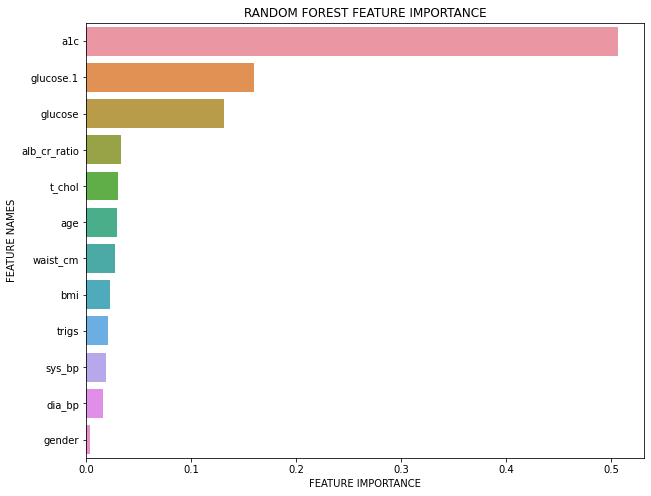

In [39]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
 
#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
 
#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(RFclassifier.feature_importances_,label,'RANDOM FOREST')
weight =RFclassifier.feature_importances_
print(weight)

In [42]:
glucose = pd.read_csv('glucosePredictions.csv')
G0=glucose.iloc[:,0]
G1=glucose.iloc[:,1]
G2=glucose.iloc[:,2]
Age = pd.read_csv('AgePredictions.csv')
A0=Age.iloc[:,0]
A1=Age.iloc[:,1]
A2=Age.iloc[:,2]
bmi = pd.read_csv('BMIPredictions.csv')
B0=bmi.iloc[:,0]
B1=bmi.iloc[:,1]
B2=bmi.iloc[:,2]
wai = pd.read_csv('waistPredictions.csv')
W0=wai.iloc[:,0]
W1=wai.iloc[:,1]
W2=wai.iloc[:,2]
sys = pd.read_csv('sysBPPredictions.csv')
S0=sys.iloc[:,0]
S1=sys.iloc[:,1]
S2=sys.iloc[:,2]
dia = pd.read_csv('diasBPPredictions.csv')
D0=dia.iloc[:,0]
D1=dia.iloc[:,1]
D2=dia.iloc[:,2]
ratio = pd.read_csv('albcrPredictions.csv')
alb0=ratio.iloc[:,0]
alb1=ratio.iloc[:,1]
alb2=ratio.iloc[:,2]
chol = pd.read_csv('CholesPredictions.csv')
C0=chol.iloc[:,0]
C1=chol.iloc[:,1]
C2=chol.iloc[:,2]
tr = pd.read_csv('triglyPredictions.csv')
T0=tr.iloc[:,0]
T1=tr.iloc[:,1]
T2=tr.iloc[:,2]
a1c = pd.read_csv('a1cPredictions.csv')
a1c0=a1c.iloc[:,0]
a1c1=a1c.iloc[:,1]
a1c2=a1c.iloc[:,2]
pl = pd.read_csv('SerumGluPredictions.csv')
Se0=pl.iloc[:,0]
Se1=pl.iloc[:,1]
Se2=pl.iloc[:,2]

Gen0=B0
Gen1=B1
Gen2=B2
####Gender ---take the same output as existing

In [43]:

res=[]
for (a0,a1,a2,b0,b1,b2,c0,c1,c2,d0,d1,d2,e0,e1,e2,f0,f1,f2,g0,g1,g2,h0,h1,h2,i0,i1,i2,j0,j1,j2,k0,k1,k2,l0,l1,l2) in zip(Gen0,Gen1,Gen2,A0,A1,A2,B0,B1,B2,W0,W1,W2,S0,S1,S2,D0,D1,D2,alb0,alb1,alb2,C0,C1,C2,G0,G1,G2,T0,T1,T2,a1c0,a1c1,a1c2,Se0,Se1,Se2):

  s0= (a0*weight[0])+(b0*weight[1])+(c0*weight[2])+(d0*weight[3])+(e0*weight[4])+(f0*weight[5])+(g0*weight[6])+(h0*weight[7])+(i0*weight[8])+(j0*weight[9])+(k0*weight[10])+(l0*weight[11])
  s1= (a1*weight[0])+(b1*weight[1])+(c1*weight[2])+(d1*weight[3])+(e1*weight[4])+(f1*weight[5])+(g1*weight[6])+(h1*weight[7])+(i1*weight[8])+(j1*weight[9])+(k1*weight[10])+(l1*weight[11])
  s2= (a2*weight[0])+(b2*weight[1])+(c2*weight[2])+(d2*weight[3])+(e2*weight[4])+(f2*weight[5])+(g2*weight[6])+(h2*weight[7])+(i2*weight[8])+(j2*weight[9])+(k2*weight[10])+(l2*weight[11])

  result =max(s0,s1,s2)
  if result ==s0:
    add=0
  elif result ==s1:
    add=1
  elif result==s2:
    add=2

  res.append(add)

print('result',res)


result [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,

In [86]:
acc=0
x_train, x_test, y_train, y_test = train_test_split(x, res, test_size=0.3)
RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
RFclassifier.fit(x_train, y_train)
y_pred = RFclassifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Classifier Type: Random Forest')
print('Classification Report')
print(classification_report(y_test, y_pred))
print('Accuracy: ',acc)
import pickle
filename = 'RFdiabetes.pkl'
pickle.dump(RFclassifier, open(filename, 'wb'))

Classifier Type: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       957
           1       0.98      0.98      0.98       180
           2       0.98      0.96      0.97       425

    accuracy                           0.99      1562
   macro avg       0.98      0.98      0.98      1562
weighted avg       0.99      0.99      0.99      1562

Accuracy:  0.9852752880921894


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, res, test_size=0.2)
lgb_clf = lgb.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)
lgb_clf.fit(x_train,y_train)
y_pred = lgb_clf.predict(x_test)
print(classification_report(y_test, y_pred))
pickle.dump(lgb_clf, open('lgbClassifierDiabetes.pkl', 'wb'))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       642
           1       0.97      0.97      0.97       117
           2       0.96      0.98      0.97       283

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



In [63]:
#SVM =70%
#LOGISTIC =68%
#DecisionTree =97%